# autugrad

In [5]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cpu"
torch.set_default_device(device)

x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)
learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
aug_a=a.item()
aug_b=b.item()
aug_c=c.item()
aug_d=d.item()

99 1108.3397216796875
199 762.7872314453125
299 526.4239501953125
399 364.5614318847656
499 253.5898895263672
599 177.422119140625
699 125.08293151855469
799 89.0775146484375
899 64.28085327148438
999 47.184993743896484
1099 35.385536193847656
1199 27.23302459716797
1299 21.594385147094727
1399 17.690532684326172
1499 14.985031127929688
1599 13.108192443847656
1699 11.805021286010742
1799 10.899314880371094
1899 10.269307136535645
1999 9.830703735351562
Result: y = -0.030177127569913864 + 0.8429680466651917 x + 0.005206054542213678 x^2 + -0.0913713350892067 x^3


In [6]:
class LegendrePolynomial3(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    P3 = LegendrePolynomial3.apply
    #forward
    y_pred = a + b * P3(c + d * x)
    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    #backward
    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')
new_a=a.item()
new_b=b.item()
new_c=c.item()
new_d=d.item()

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.745729446411133
999 14.877889633178711
1099 12.93176555633545
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375999450684
1699 9.220745086669922
1799 9.091286659240723
1899 9.003362655639648
1999 8.943641662597656
Result: y = -2.9753338681715036e-10 + -2.208526849746704 * P3(-1.1693186696692948e-10 + 0.2554861009120941 x)


Autograd Result: y = -0.030177127569913864 + 0.8429680466651917 x + 0.005206054542213678 x^2 + -0.0913713350892067 x^3
P3 Result: y = -2.9753338681715036e-10 + -2.208526849746704 * P3(-1.1693186696692948e-10 + 0.2554861009120941 x)


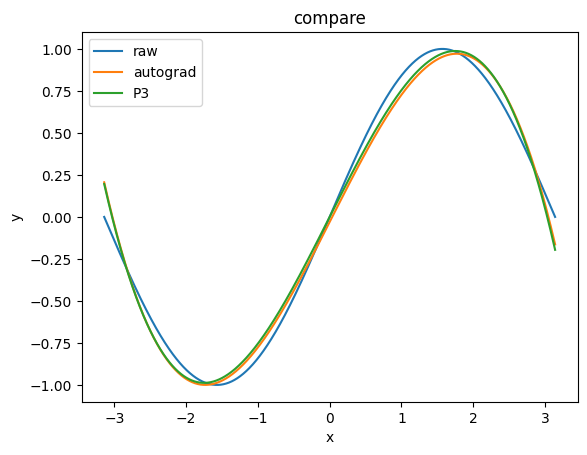

In [12]:
import numpy as np
import matplotlib.pyplot as plt

print(f'Autograd Result: y = {aug_a} + {aug_b} x + {aug_c} x^2 + {aug_d} x^3')
print(f'P3 Result: y = {new_a} + {new_b} * P3({new_c} + {new_d} x)')
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
y_aug = aug_a + aug_b * x + aug_c * x ** 2 + aug_d * x ** 3
y_new = new_a + new_b * P3(new_c + new_d * x)
plt.plot(x,y,label='raw')
plt.plot(x,y_aug,label='autograd')
plt.plot(x,y_new,label='P3')
plt.title('compare')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()